Device: cuda


Saving megares_fasta_processed.csv to megares_fasta_processed (3).csv
Cleaned dataset: (8733, 9)  | unique mechanisms: 233
Label encoding done. Total mechanisms: 233
Train/Val/Test mechanisms: 163/35/35
Vocab size: 1025
Tokenised shapes: (7557, 512) (7557, 2)
Tasks | train:1500 val:300 test:400  (N=3,K=5,Q=10)
Meta-training (Reptile - Optimized)...


  5%|▌         | 50/1000 [02:05<8:06:31, 30.73s/it]


[50/1000] loss=4.964 train=0.598±0.147 val=0.564±0.155 test=0.541±0.147
✓ New best model saved (val_acc=0.564)


 10%|█         | 100/1000 [04:13<7:46:09, 31.08s/it]


[100/1000] loss=0.983 train=0.580±0.159 val=0.586±0.152 test=0.548±0.148
✓ New best model saved (val_acc=0.586)


 15%|█▌        | 150/1000 [06:20<7:19:43, 31.04s/it]


[150/1000] loss=1.574 train=0.559±0.144 val=0.580±0.160 test=0.540±0.139


 20%|██        | 200/1000 [08:28<6:54:18, 31.07s/it]


[200/1000] loss=2.401 train=0.580±0.165 val=0.579±0.153 test=0.558±0.144


 25%|██▌       | 250/1000 [10:35<6:29:06, 31.13s/it]


[250/1000] loss=1.980 train=0.584±0.163 val=0.583±0.143 test=0.545±0.141


 30%|███       | 300/1000 [12:43<6:02:08, 31.04s/it]


[300/1000] loss=1.727 train=0.582±0.161 val=0.582±0.146 test=0.550±0.140


 35%|███▌      | 350/1000 [14:51<5:36:55, 31.10s/it]


[350/1000] loss=12.329 train=0.596±0.183 val=0.589±0.146 test=0.551±0.151
✓ New best model saved (val_acc=0.589)


 40%|████      | 400/1000 [16:58<5:11:17, 31.13s/it]


[400/1000] loss=3.487 train=0.583±0.162 val=0.585±0.147 test=0.557±0.147


 45%|████▌     | 450/1000 [19:06<4:45:17, 31.12s/it]


[450/1000] loss=1.204 train=0.579±0.170 val=0.583±0.149 test=0.550±0.151


 50%|█████     | 500/1000 [21:14<4:19:22, 31.12s/it]


[500/1000] loss=1.048 train=0.592±0.166 val=0.586±0.144 test=0.552±0.134


 55%|█████▌    | 550/1000 [23:22<3:53:21, 31.11s/it]


[550/1000] loss=64.647 train=0.587±0.162 val=0.581±0.146 test=0.550±0.130


 60%|██████    | 600/1000 [25:29<3:27:19, 31.10s/it]


[600/1000] loss=4.112 train=0.575±0.188 val=0.591±0.140 test=0.538±0.138
✓ New best model saved (val_acc=0.591)


 65%|██████▌   | 650/1000 [27:37<3:01:02, 31.03s/it]


[650/1000] loss=2.109 train=0.578±0.167 val=0.575±0.141 test=0.554±0.135


 70%|███████   | 700/1000 [29:44<2:35:30, 31.10s/it]


[700/1000] loss=7.239 train=0.607±0.168 val=0.575±0.137 test=0.543±0.136


 75%|███████▌  | 750/1000 [31:52<2:09:38, 31.11s/it]


[750/1000] loss=1.479 train=0.579±0.159 val=0.579±0.145 test=0.544±0.142


 80%|████████  | 800/1000 [34:00<1:43:43, 31.12s/it]


[800/1000] loss=19.034 train=0.578±0.163 val=0.580±0.152 test=0.542±0.135


 85%|████████▌ | 850/1000 [36:08<1:17:46, 31.11s/it]


[850/1000] loss=1.794 train=0.576±0.153 val=0.578±0.156 test=0.554±0.144


 90%|█████████ | 900/1000 [38:15<51:54, 31.15s/it]


[900/1000] loss=15.454 train=0.583±0.152 val=0.577±0.151 test=0.550±0.137


 95%|█████████▌| 950/1000 [40:23<25:56, 31.14s/it]


[950/1000] loss=0.950 train=0.583±0.172 val=0.587±0.160 test=0.546±0.146


100%|█████████▉| 999/1000 [42:31<00:02,  2.55s/it]


[1000/1000] loss=1.780 train=0.596±0.176 val=0.577±0.153 test=0.550±0.144
Early stopping.

Best Val Acc: 0.5909



FINAL TEST RESULTS:
  Accuracy: 0.541 ± 0.137
  Loss: 2.907
  Episodes: 400
  Random baseline (1/3): 0.333


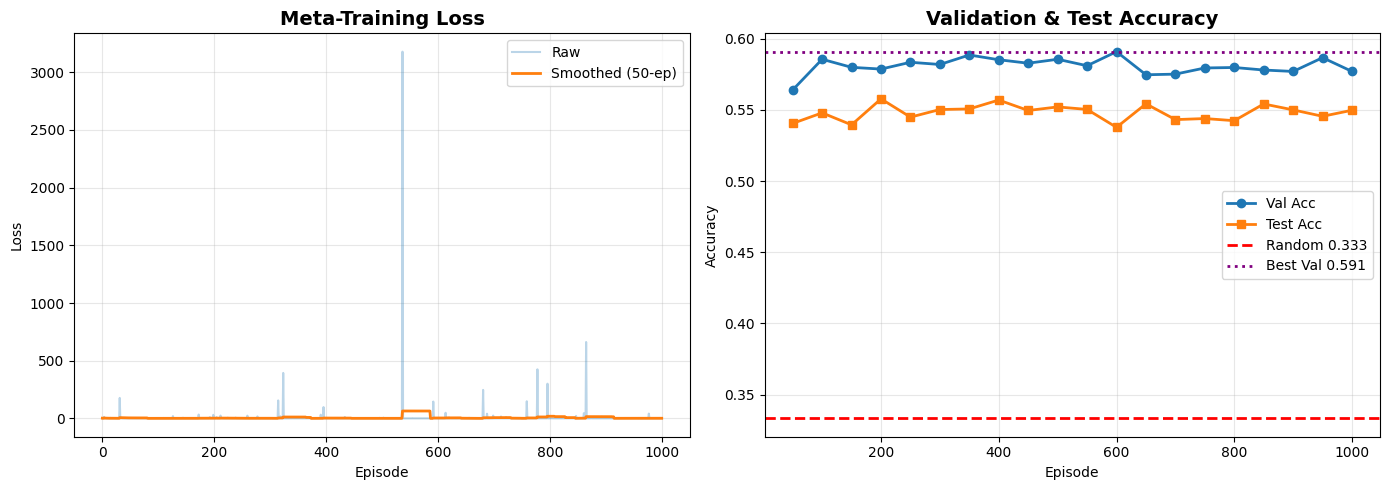


Training completed successfully!


In [ ]:

import os, random, numpy as np, pandas as pd, torch, torch.nn as nn, torch.nn.functional as F
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

# ----------------------------
# 0) Seeds & device
# ----------------------------
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED); random.seed(RANDOM_SEED); torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.backends.cudnn.deterministic = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ----------------------------
# 1) Load & clean data
# ----------------------------
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

df = df.dropna(subset=["sequence","mechanism"]).reset_index(drop=True)
df["sequence"] = df["sequence"].str.upper().str.replace(r"[^ACGT]", "", regex=True)
print("Cleaned dataset:", df.shape, " | unique mechanisms:", df["mechanism"].nunique())

# ----------------------------
# 1.5) Label encoding
# ----------------------------
le = LabelEncoder()
df["mechanism_label"] = le.fit_transform(df["mechanism"])
print("Label encoding done. Total mechanisms:", len(le.classes_))

# ----------------------------
# 2) Mechanism split (70/15/15)
# ----------------------------
mechs = np.array(sorted(df["mechanism_label"].unique()))
train_mechs, temp_mechs = train_test_split(mechs, test_size=0.30, random_state=RANDOM_SEED, shuffle=True)
val_mechs,   test_mechs = train_test_split(temp_mechs, test_size=0.50, random_state=RANDOM_SEED, shuffle=True)

train_df = df[df.mechanism_label.isin(train_mechs)].reset_index(drop=True)
val_df   = df[df.mechanism_label.isin(val_mechs)].reset_index(drop=True)
test_df  = df[df.mechanism_label.isin(test_mechs)].reset_index(drop=True)
print(f"Train/Val/Test mechanisms: {len(train_mechs)}/{len(val_mechs)}/{len(test_mechs)}")

# ----------------------------
# 3) k-merisation & tokenisation
# ----------------------------
KMER = 5
MAX_KMER_SEQ = 512
PAD_ID = 0

def kmerize(seq, k=KMER):
    L = len(seq)
    if L < k: return []
    return [seq[i:i+k] for i in range(L - k + 1)]

train_df["kmer_seq"] = train_df["sequence"].apply(kmerize)
val_df["kmer_seq"]   = val_df["sequence"].apply(kmerize)
test_df["kmer_seq"]  = test_df["sequence"].apply(kmerize)

kmer_counts = Counter(k for seq in train_df["kmer_seq"] for k in seq)
kmers_sorted = [k for k,_ in kmer_counts.most_common()]
kmer2id = {k: i+1 for i,k in enumerate(kmers_sorted)}
vocab_size = len(kmer2id) + 1
print("Vocab size:", vocab_size)

def encode_kmers(kmer_list, max_len=MAX_KMER_SEQ):
    ids = [kmer2id.get(k, PAD_ID) for k in kmer_list]
    if len(ids) < max_len:
        ids += [PAD_ID] * (max_len - len(ids))
    else:
        ids = ids[:max_len]
    return np.array(ids, dtype=np.int64)

for dfp in [train_df, val_df, test_df]:
    dfp["tok_seq"] = dfp["kmer_seq"].apply(lambda s: encode_kmers(s, max_len=MAX_KMER_SEQ))

def build_matrix_tok(dfp):
    X_tok = np.stack(dfp["tok_seq"].to_numpy())
    X_num = dfp[["gc_content","seq_len"]].to_numpy(np.float32)
    y = dfp["mechanism_label"].to_numpy(np.int64)
    return X_tok, X_num, y

Xtr_tok, Xtr_num, ytr = build_matrix_tok(train_df)
Xva_tok, Xva_num, yva = build_matrix_tok(val_df)
Xte_tok, Xte_num, yte = build_matrix_tok(test_df)
print("Tokenised shapes:", Xtr_tok.shape, Xtr_num.shape)

# ----------------------------
# 4) Index map by mechanism
# ----------------------------
def mech_index(y):
    d = defaultdict(list)
    for i, lab in enumerate(y): d[lab].append(i)
    return {k: np.asarray(v, dtype=int) for k,v in d.items()}

idx_tr, idx_va, idx_te = mech_index(ytr), mech_index(yva), mech_index(yte)

# ----------------------------
# 5) Episodic task builder
# ----------------------------
def create_tasks_tok(X_tok, X_num, y, idx_map, num_tasks=1000, N=3, K=3, Q=5, seed=RANDOM_SEED):
    rng = np.random.default_rng(seed)
    tasks = []
    valid = [m for m, ids in idx_map.items() if len(ids) >= K + Q]
    if len(valid) < N: return tasks
    for _ in range(num_tasks):
        chosen_mechs = rng.choice(valid, size=N, replace=False)
        s_tok, s_num, s_y = [], [], []
        q_tok, q_num, q_y = [], [], []
        for j, m in enumerate(chosen_mechs):
            ids = rng.choice(idx_map[m], size=K + Q, replace=False)
            s_ids, q_ids = ids[:K], ids[K:K+Q]
            s_tok.append(X_tok[s_ids]); s_num.append(X_num[s_ids]); s_y.append(np.full(K, j, np.int64))
            q_tok.append(X_tok[q_ids]); q_num.append(X_num[q_ids]); q_y.append(np.full(Q, j, np.int64))
        tasks.append({
            "support_tok": np.vstack(s_tok),
            "support_num": np.vstack(s_num),
            "support_y": np.concatenate(s_y),
            "query_tok": np.vstack(q_tok),
            "query_num": np.vstack(q_num),
            "query_y": np.concatenate(q_y),
            "mechs": list(chosen_mechs)
        })
    return tasks

N, K, Q = 3, 5, 10
train_tasks = create_tasks_tok(Xtr_tok, Xtr_num, ytr, idx_tr, num_tasks=1500, N=N, K=K, Q=Q)
val_tasks   = create_tasks_tok(Xva_tok, Xva_num, yva, idx_va, num_tasks=300,  N=N, K=K, Q=Q)
test_tasks  = create_tasks_tok(Xte_tok, Xte_num, yte, idx_te, num_tasks=400,  N=N, K=K, Q=Q)
print(f"Tasks | train:{len(train_tasks)} val:{len(val_tasks)} test:{len(test_tasks)}  (N={N},K={K},Q={Q})")

# ================================================================
# 6) OPTIMIZED Reptile / MAML model
# ================================================================

class Encoder(nn.Module):
    """Deep CNN encoder inspired by ResNet with multi-scale feature extraction"""
    def __init__(self, vocab_size, embed_dim=256, num_features=2, pad_idx=0):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 128, padding_idx=pad_idx)

        # Multi-scale convolutional blocks (like Inception)
        # Branch 1: Small receptive field (local patterns)
        self.conv1 = nn.Sequential(
            nn.Conv1d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )

        # Branch 2: Medium receptive field (motifs)
        self.conv2 = nn.Sequential(
            nn.Conv1d(128, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(128, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )

        # Branch 3: Large receptive field (long-range patterns)
        self.conv3 = nn.Sequential(
            nn.Conv1d(128, 128, kernel_size=9, padding=4),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(128, 128, kernel_size=9, padding=4),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )

        # Combine multi-scale features
        self.fusion = nn.Sequential(
            nn.Conv1d(384, 256, kernel_size=1),  # 1x1 conv for channel reduction
            nn.BatchNorm1d(256),
            nn.ReLU()
        )

        # Deeper processing with residual connections
        self.deep_conv = nn.Sequential(
            nn.Conv1d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv1d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU()
        )

        # Global pooling options
        self.max_pool = nn.AdaptiveMaxPool1d(1)
        self.avg_pool = nn.AdaptiveAvgPool1d(1)

        # Final embedding layer
        self.fc = nn.Sequential(
            nn.Linear(512 + num_features, 512),  # 256*2 (max+avg pool) + numerical features
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, embed_dim)
        )

    def forward(self, X_tok, X_num):
        # Embed k-mers
        x = self.embedding(X_tok)  # (B, L, 128)
        x = x.permute(0, 2, 1)     # (B, 128, L)

        # Multi-scale feature extraction
        f1 = self.conv1(x)  # Local patterns
        f2 = self.conv2(x)  # Motifs
        f3 = self.conv3(x)  # Long-range

        # Concatenate multi-scale features
        x = torch.cat([f1, f2, f3], dim=1)  # (B, 384, L)

        # Fuse and process
        x = self.fusion(x)      # (B, 256, L)
        x_res = x
        x = self.deep_conv(x)   # (B, 256, L)
        x = x + x_res           # Residual connection

        # Dual pooling (captures both max activation and average)
        x_max = self.max_pool(x).squeeze(-1)  # (B, 256)
        x_avg = self.avg_pool(x).squeeze(-1)  # (B, 256)
        x_pool = torch.cat([x_max, x_avg], dim=1)  # (B, 512)

        # Combine with numerical features
        z = torch.cat([x_pool, X_num], dim=1)
        z = self.fc(z)
        return z

class MAMLNet(nn.Module):
    def __init__(self, vocab_size, out_classes, embed_dim=256, num_features=2, pad_idx=0):
        super().__init__()
        self.encoder = Encoder(vocab_size, embed_dim, num_features, pad_idx)
        self.classifier = nn.Linear(embed_dim, out_classes)

    def forward(self, X_tok, X_num):
        emb = self.encoder(X_tok, X_num)
        logits = self.classifier(emb)
        return logits, emb

# OPTIMIZATION 1: Avoid deepcopy, use state_dict instead
def get_param_snapshot(model):
    """Lightweight parameter snapshot"""
    return {name: p.clone().detach() for name, p in model.named_parameters()}

def restore_params(model, snapshot):
    """Restore parameters from snapshot"""
    for name, p in model.named_parameters():
        p.data.copy_(snapshot[name])

# OPTIMIZATION 2: Pre-create optimizer (reuse)
def adapt_on_support_fast(model, s_tok, s_num, s_y, inner_steps=5, inner_lr=5e-3):
    """Fast adaptation without creating new optimizer"""
    model.train()
    criterion = nn.CrossEntropyLoss()

    # Manual SGD update (faster than creating optimizer)
    for _ in range(inner_steps):
        logits, _ = model(s_tok, s_num)
        loss = criterion(logits, s_y)

        # Manual gradient update
        grads = torch.autograd.grad(loss, model.parameters(), create_graph=False)
        with torch.no_grad():
            for p, g in zip(model.parameters(), grads):
                p.data -= inner_lr * g

# OPTIMIZATION 3: Batched evaluation
def evaluate_meta_fast(model, tasks, device, inner_steps=5, inner_lr=5e-3, batch_size=8):
    """Faster evaluation with batching"""
    model.eval()
    accs, losses = [], []

    for i in range(0, len(tasks), batch_size):
        batch_tasks = tasks[i:i+batch_size]

        for t in batch_tasks:
            s_tok = torch.from_numpy(t["support_tok"]).long().to(device)
            q_tok = torch.from_numpy(t["query_tok"]).long().to(device)
            s_num = torch.from_numpy(t["support_num"]).float().to(device)
            q_num = torch.from_numpy(t["query_num"]).float().to(device)
            sY = torch.from_numpy(t["support_y"]).long().to(device)
            qY = torch.from_numpy(t["query_y"]).long().to(device)

            # Save original params
            orig_params = get_param_snapshot(model)

            # Adapt
            model.train()
            adapt_on_support_fast(model, s_tok, s_num, sY, inner_steps, inner_lr)

            # Evaluate
            model.eval()
            with torch.no_grad():
                logits_q, _ = model(q_tok, q_num)
                preds = logits_q.argmax(1)
                acc = (preds == qY).float().mean().item()
                loss_q = F.cross_entropy(logits_q, qY).item()

            accs.append(acc)
            losses.append(loss_q)

            # Restore params
            restore_params(model, orig_params)
            del orig_params

    return float(np.mean(accs)), float(np.std(accs)), float(np.mean(losses))

# ----------------------------
# 7) OPTIMIZED Meta-training (Reptile)
# ----------------------------
model = MAMLNet(vocab_size=vocab_size, out_classes=N, embed_dim=256,
                num_features=Xtr_num.shape[1], pad_idx=PAD_ID).to(device)

# OPTIMIZATION 4: Reduced hyperparameters
META_LR = 5e-3
INNER_LR = 5e-3
INNER_STEPS = 5  # Reduced from 10
META_BATCH = 4
EPISODES = 1000  # Reduced from 2000
EVAL_EVERY = 50
PATIENCE = 8

best_val, bad = 0.0, 0
train_meta_losses, val_accs, val_losses, test_accs = [], [], [], []
print("Meta-training (Reptile - Optimized)...")

for ep in tqdm(range(1, EPISODES+1)):
    model.train()
    deltas = [torch.zeros_like(p, device=device) for p in model.parameters()]
    meta_loss = 0.0

    for _ in range(META_BATCH):
        t = random.choice(train_tasks)
        s_tok = torch.from_numpy(t["support_tok"]).long().to(device)
        q_tok = torch.from_numpy(t["query_tok"]).long().to(device)
        s_num = torch.from_numpy(t["support_num"]).float().to(device)
        q_num = torch.from_numpy(t["query_num"]).float().to(device)
        sY = torch.from_numpy(t["support_y"]).long().to(device)
        qY = torch.from_numpy(t["query_y"]).long().to(device)

        # Save params
        orig_params = get_param_snapshot(model)

        # Adapt
        adapt_on_support_fast(model, s_tok, s_num, sY, inner_steps=INNER_STEPS, inner_lr=INNER_LR)

        # Compute meta loss
        model.eval()
        with torch.no_grad():
            logits, _ = model(q_tok, q_num)
            meta_loss += F.cross_entropy(logits, qY).item()

        # Compute deltas
        for i, (p_orig, p_adapt) in enumerate(zip(orig_params.values(), model.parameters())):
            deltas[i] += (p_adapt.data - p_orig)

        # Restore
        restore_params(model, orig_params)
        del orig_params

    # Meta update
    with torch.no_grad():
        for i, p in enumerate(model.parameters()):
            p.data += (META_LR / META_BATCH) * deltas[i]

    train_meta_losses.append(meta_loss / META_BATCH)

    if ep % EVAL_EVERY == 0:
        tr_acc, tr_std, _ = evaluate_meta_fast(model, train_tasks[:100], device, INNER_STEPS, INNER_LR)
        va_acc, va_std, va_loss = evaluate_meta_fast(model, val_tasks, device, INNER_STEPS, INNER_LR)
        te_acc, te_std, te_loss = evaluate_meta_fast(model, test_tasks, device, INNER_STEPS, INNER_LR)

        val_accs.append(va_acc)
        val_losses.append(va_loss)
        test_accs.append(te_acc)

        print(f"\n[{ep}/{EPISODES}] loss={np.mean(train_meta_losses[-EVAL_EVERY:]):.3f} "
              f"train={tr_acc:.3f}±{tr_std:.3f} val={va_acc:.3f}±{va_std:.3f} test={te_acc:.3f}±{te_std:.3f}")

        if va_acc > best_val:
            best_val, bad = va_acc, 0
            torch.save(model.state_dict(), "best_reptile_meta.pt")
            print(f"✓ New best model saved (val_acc={best_val:.3f})")
        else:
            bad += 1

        if bad >= PATIENCE:
            print("Early stopping.")
            break

print(f"\nBest Val Acc: {best_val:.4f}")

# ----------------------------
# 8) Final Test Evaluation
# ----------------------------
model.load_state_dict(torch.load("best_reptile_meta.pt", map_location=device))
test_acc, test_std, test_loss = evaluate_meta_fast(model, test_tasks, device, INNER_STEPS, INNER_LR)
print(f"\nFINAL TEST RESULTS:")
print(f"  Accuracy: {test_acc:.3f} ± {test_std:.3f}")
print(f"  Loss: {test_loss:.3f}")
print(f"  Episodes: {len(test_tasks)}")
print(f"  Random baseline (1/{N}): {1.0/N:.3f}")

# ----------------------------
# 9) Training Curves
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(train_meta_losses, alpha=0.3, label='Raw')
axes[0].plot(pd.Series(train_meta_losses).rolling(50, 1).mean(), label='Smoothed (50-ep)', linewidth=2)
axes[0].set_title("Meta-Training Loss", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

steps = [i * EVAL_EVERY for i in range(1, len(val_accs) + 1)]
axes[1].plot(steps, val_accs, marker='o', label="Val Acc", linewidth=2, markersize=6)
axes[1].plot(steps, test_accs, marker='s', label="Test Acc", linewidth=2, markersize=6)
axes[1].axhline(1.0/N, color='r', linestyle='--', label=f"Random {1.0/N:.3f}", linewidth=2)
axes[1].axhline(best_val, color='purple', linestyle=':', label=f"Best Val {best_val:.3f}", linewidth=2)
axes[1].set_title("Validation & Test Accuracy", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Training completed successfully!")
print("="*60)